Ashima Fatima Seik Mugibur Raghman, 21BAI1830

# Import Corpus

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d praveengovi/tamil-language-corpus-for-nlp

Dataset URL: https://www.kaggle.com/datasets/praveengovi/tamil-language-corpus-for-nlp
License(s): Attribution 4.0 International (CC BY 4.0)
tamil-language-corpus-for-nlp.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

def unzip_file(zip_path, extract_to):
    if not os.path.isfile(zip_path):
        raise FileNotFoundError(f"The file {zip_path} does not exist.")

    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f"Files extracted to {extract_to}")

In [ ]:
zip_file_path = '/content/tamil-language-corpus-for-nlp.zip'
extract_directory = '/content/tamil-language-corpus-for-nlp'

unzip_file(zip_file_path, extract_directory)

In [ ]:
def check_encoding(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file.read()
        print(f"{file_path} is in UTF-8 encoding.")
    except UnicodeDecodeError:
        print(f"{file_path} is not in UTF-8 encoding.")

In [ ]:
check_encoding('/content/tamil-language-corpus-for-nlp/tamil-language-Corpus/tamil-language-Corpus/test/AA_wiki_08.txt')

/content/tamil-language-corpus-for-nlp/tamil-language-Corpus/tamil-language-Corpus/test/AA_wiki_08.txt is in UTF-8 encoding.


In [ ]:
'''import re

with open('/content/tamil-language-corpus-for-nlp/Tamil_Articles_Corpus/Tamil_Articles_Corpus/Tamil_Articles_Corpus.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()'''

In [ ]:
import glob

# Function to read all text files from a directory and concatenate their contents
def load_corpus_from_folder(folder_path):
    corpus = ""
    for file_path in glob.glob(os.path.join(folder_path, '*.txt')):
        with open(file_path, 'r', encoding='utf-8') as file:
            corpus += file.read() + " "
    return corpus.strip()

In [ ]:
folder_path = '/content/tamil-language-corpus-for-nlp/tamil-language-Corpus/tamil-language-Corpus/test'
corpus = load_corpus_from_folder(folder_path)

# 1) Type Token Analysis

In [ ]:
pip install nltk tamil matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.9/208.9 kB 12.8 MB/s eta 0:00:00


In [ ]:
import re
import nltk
from collections import Counter

In [ ]:
def type_token_analysis(text):
    words = text.split()
    types = set(words)
    tokens = len(words)
    type_token_ratio = len(types) / tokens
    return len(types), tokens, type_token_ratio

In [ ]:
types, tokens, ttr = type_token_analysis(corpus)
print(f'Types: {types}')
print(f'Tokens: {tokens}')
print(f'Type-Token Ratio: {ttr:.4f}')

Types: 231401
Tokens: 880050
Type-Token Ratio: 0.2629


In [ ]:
def compute_type_token_growth(corpus):
    words = corpus.split()
    unique_words = set()
    type_counts = []
    token_counts = []

    for idx, word in enumerate(words):
        unique_words.add(word)
        type_counts.append(len(unique_words))
        token_counts.append(idx + 1)

    return type_counts, token_counts

# 2) Syllable Analysis

In [ ]:
def split_tamil_syllables(word):
    # Regular expression to match Tamil characters
    pattern = re.compile(r'[\u0B80-\u0BFF][\u0B82\u0BBE-\u0BCD]?')
    return pattern.findall(word)

In [ ]:
def syllable_analysis(text):
    words = text.split()
    syllables = []
    initial_syllables = []
    medial_syllables = []
    final_syllables = []

    for word in words:
        word_syllables = split_tamil_syllables(word)
        syllables.extend(word_syllables)

        if len(word_syllables) > 0:
            initial_syllables.append(word_syllables[0])
        if len(word_syllables) > 2:
            medial_syllables.extend(word_syllables[1:-1])
        if len(word_syllables) > 1:
            final_syllables.append(word_syllables[-1])

    most_freq_syllables = Counter(syllables).most_common(10)
    most_freq_initial = Counter(initial_syllables).most_common(10)
    most_freq_medial = Counter(medial_syllables).most_common(10)
    most_freq_final = Counter(final_syllables).most_common(10)

    return {
        'most_freq_syllables': most_freq_syllables,
        'most_freq_initial': most_freq_initial,
        'most_freq_medial': most_freq_medial,
        'most_freq_final': most_freq_final
    }

In [ ]:
syllable_results = syllable_analysis(corpus)
print('Most Frequent Syllables:', syllable_results['most_freq_syllables'])
print('Most Frequent Initial Syllables:', syllable_results['most_freq_initial'])
print('Most Frequent Medial Syllables:', syllable_results['most_freq_medial'])
print('Most Frequent Final Syllables:', syllable_results['most_freq_final'])

Most Frequent Syllables: [('க', 199118), ('ம்', 134419), ('ன்', 119528), ('க்', 109971), ('ல்', 107905), ('ப', 103794), ('த', 97082), ('து', 94795), ('ர்', 91021), ('ப்', 88891)]
Most Frequent Initial Syllables: [('இ', 72825), ('அ', 64538), ('ஆ', 38664), ('ப', 36367), ('எ', 34679), ('உ', 29705), ('க', 29038), ('ம', 27517), ('வ', 27138), ('த', 23044)]
Most Frequent Medial Syllables: [('க', 143044), ('க்', 90698), ('த்', 74536), ('ப்', 71389), ('ப', 66420), ('ட்', 64399), ('ன்', 63755), ('தி', 61084), ('ய', 56105), ('ட', 56100)]
Most Frequent Final Syllables: [('ம்', 116639), ('ல்', 78932), ('து', 65325), ('ன்', 55740), ('ர்', 47097), ('ள்', 37566), ('க', 27036), ('ன', 25683), ('ய', 21001), ('கு', 19063)]


# Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

In [ ]:
zip_file_path = '/content/Noto_Sans_Tamil.zip'
extract_directory = '/content/Noto_Sans_Tamil'

unzip_file(zip_file_path, extract_directory)

Files extracted to /content/Noto_Sans_Tamil


In [ ]:
# Register the font with matplotlib
font_path = '/content/Noto_Sans_Tamil/NotoSansTamil-VariableFont_wdth,wght.ttf'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Noto Sans Tamil'
plt.rcParams['font.sans-serif'] = ['Noto Sans Tamil']

In [ ]:
def plot_type_token_growth(type_counts, token_counts, title='Type-Token Growth Rate Analysis'):
    plt.figure(figsize=(12, 6))
    plt.plot(token_counts, type_counts, marker='o', linestyle='-', color='b')
    plt.xlabel('Tokens')
    plt.ylabel('Types')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
def compute_type_token_growth(corpus):
    words = corpus.split()
    unique_words = set()
    type_counts = []
    token_counts = []

    for idx, word in enumerate(words):
        unique_words.add(word)
        type_counts.append(len(unique_words))
        token_counts.append(idx + 1)

    return type_counts, token_counts

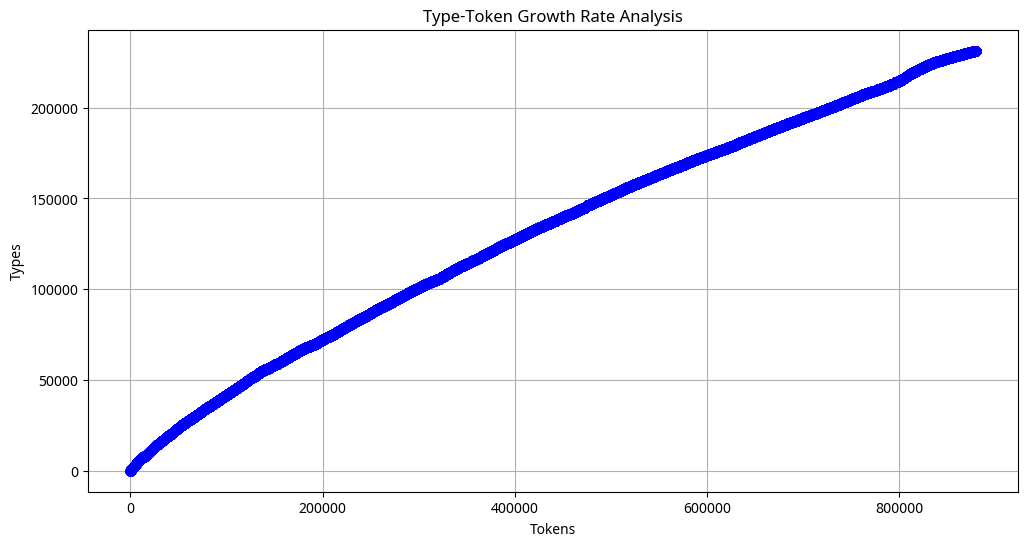

In [55]:
type_counts, token_counts = compute_type_token_growth(corpus)

plot_type_token_growth(type_counts, token_counts, title='Type-Token Growth Rate Analysis')

In [ ]:
def plot_syllable_frequency(syllable_data, title):
    syllables, frequencies = zip(*syllable_data)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(syllables), y=list(frequencies))
    plt.title(title)
    plt.ylabel('Frequency')
    plt.show()

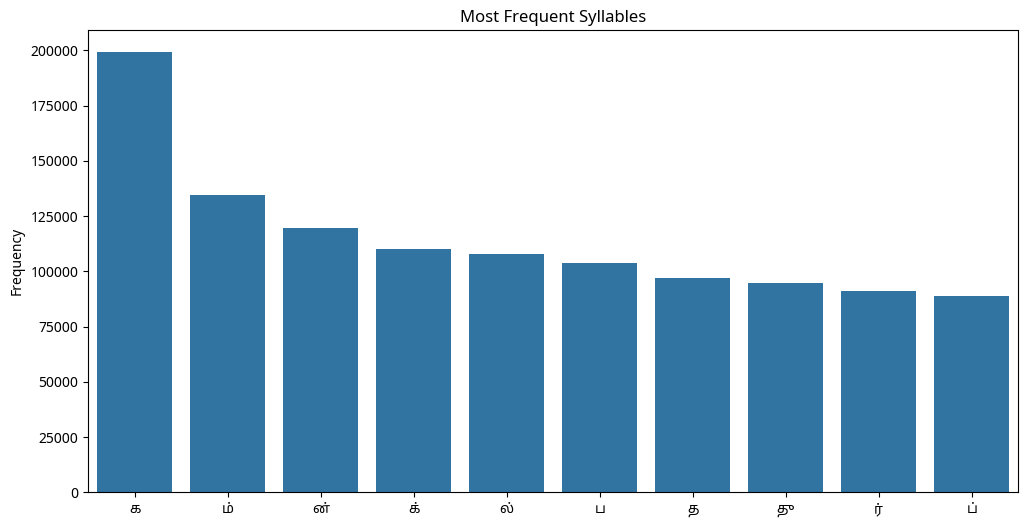

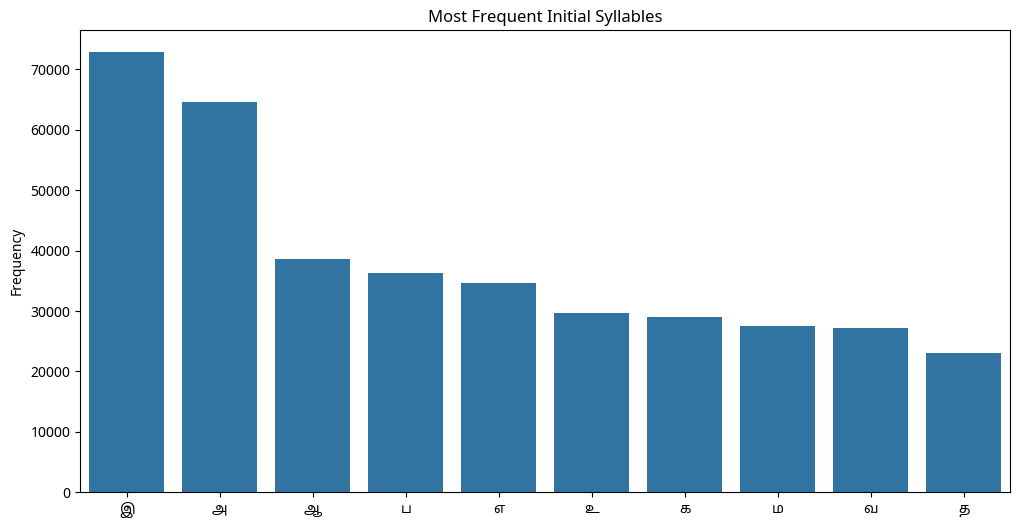

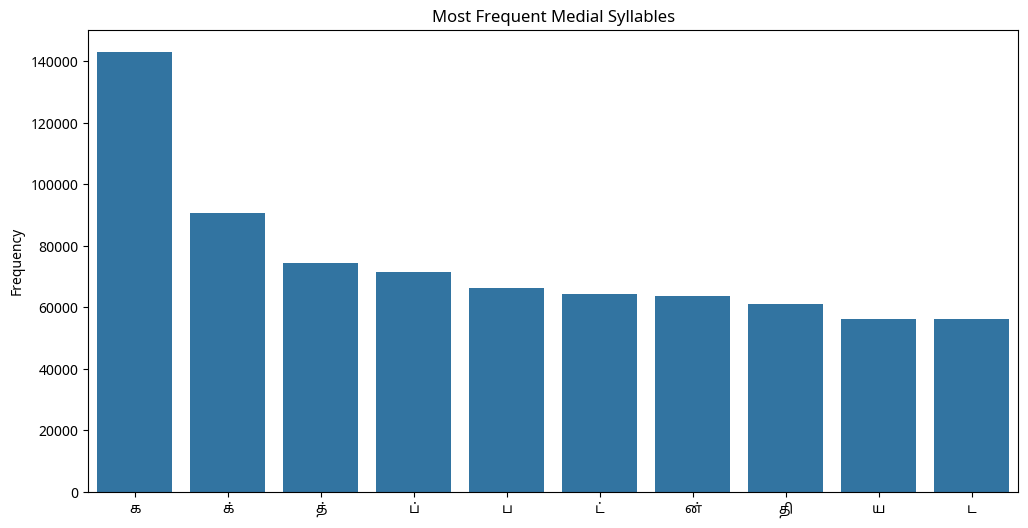

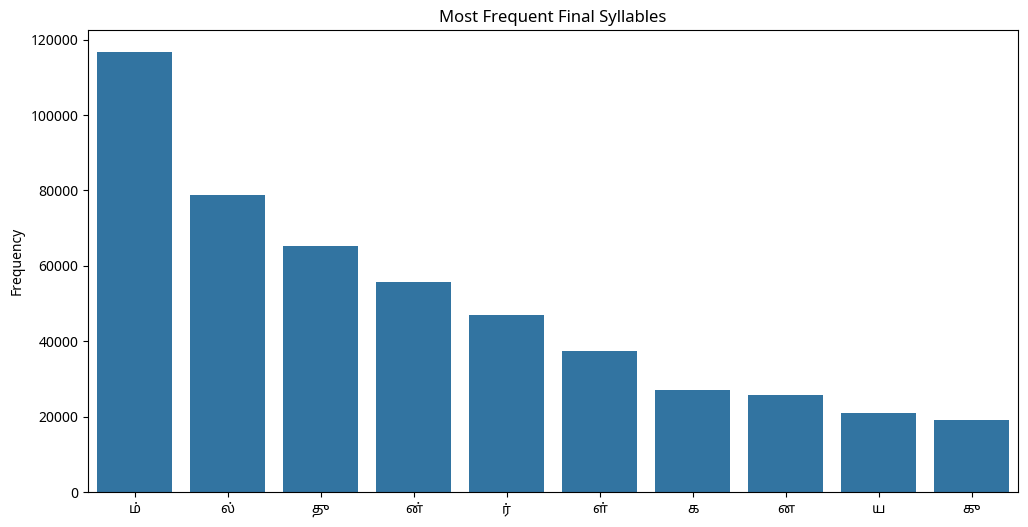

In [ ]:
plot_syllable_frequency(syllable_results['most_freq_syllables'], 'Most Frequent Syllables')
plot_syllable_frequency(syllable_results['most_freq_initial'], 'Most Frequent Initial Syllables')
plot_syllable_frequency(syllable_results['most_freq_medial'], 'Most Frequent Medial Syllables')
plot_syllable_frequency(syllable_results['most_freq_final'], 'Most Frequent Final Syllables')